### 使用梯度上升法求解PCA

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
X = np.empty([100,2])  # 2个特征
X[:,0] = np.random.uniform(0.,100.,size = 100)
X[:,1] = 0.75*X[:,0]+3.+np.random.normal(0,10.,size = 100)  # 

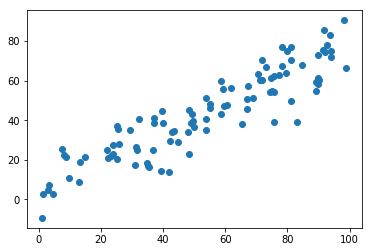

In [7]:
plt.scatter(X[:,0],X[:,1])

### demean

In [8]:
def demean(X):
    return X-np.mean(X,axis=0)  # 均值变为0  

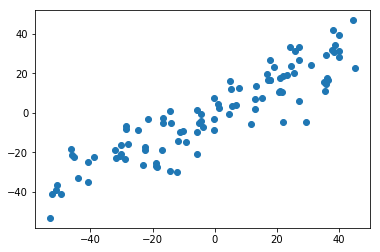

In [32]:
X_demean = demean(X)
plt.scatter(X_demean[:,0],X_demean[:,1])

In [33]:
np.mean(X_demean[:,0])

-7.460698725481052e-15

In [34]:
np.mean(X_demean[:,1])

2.2737367544323206e-15

### 梯度上升法

In [62]:
def f(w,X):
    return np.sum((X.dot(w)**2))/len(X)

In [63]:
def df_math(w,X):  # 梯度
    return X.T.dot(X.dot(w))*2./len(X)

In [64]:
def df_debug(w,X,epsilon = 0.0001):  # 二维  多维
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] +=epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1,X) - f(w_2,X))/(2*epsilon)
    return res
    

In [71]:
def direction(w):  # 将该向量转化为单位向量
    return w / np.linalg.norm(w)  # np.linalg.norm(w) 求向量的模。
def gradient_ascent(df,X,initial_w,eta,n_iters = 1e4,epsilon = 1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter<n_iters:
        gradient = df(w,X)
        last_w = w
        w = w+eta+gradient
        w = direction(w)  # 注意1：每次求一个单位向量
        if (abs(f(w,X)-f(last_w,X))< epsilon):
            break
        cur_iter +=1
    return w

In [66]:
initial_w = np.random.random(X.shape[1]) # 注意2 : 不能用0向量开始
initial_w

array([0.20917769, 0.94309031])

In [67]:
eta = 0.001

In [68]:
# 注意3 ： 不能使用StandardScaler标准化数据

In [74]:
gradient_ascent(df_debug,X_demean,initial_w,eta)

array([0.79164995, 0.61097492])

In [78]:
w = gradient_ascent(df_math,X_demean,initial_w,eta)
w

array([0.79164995, 0.61097492])

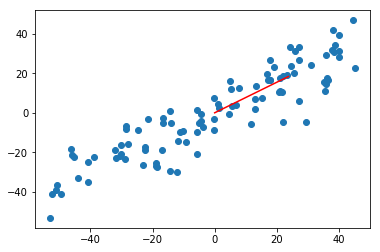

In [87]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30],color = "r")

In [93]:
X2 = np.empty([100,2])  # 2个特征
X2[:,0] = np.random.uniform(0.,100.,size = 100)
X2[:,1] = 0.75*X2[:,0]+3. 

In [94]:
X2[:,0] 

array([92.47890919, 25.80461059, 90.10747949, 58.78801492, 84.46722067,
        2.93457264,  7.8150861 , 96.96419404, 81.588201  , 91.49589   ,
       77.1391232 ,  5.4478629 , 71.50797383, 32.67904915, 19.12464212,
       37.90346856,  0.31323712, 32.80760254, 76.16182844, 96.48865309,
       39.91357086, 78.89307898, 93.58785741, 75.56425505, 47.87574519,
       63.82719222, 52.99438402, 98.71092582, 23.49476712, 45.10100332,
       72.28598342, 18.0186958 , 88.54237517, 26.79151694, 47.6913195 ,
       25.47027412, 62.50838156, 58.45579544, 54.83189234, 61.26189818,
       90.85931811, 41.0928567 , 66.92723484, 23.95204848, 28.56860184,
       88.05623582, 94.84217384, 25.80548868,  6.79022602, 75.00696313,
       48.75998255, 96.71096631, 70.65251785, 24.54022483, 91.73205365,
       42.42762842, 20.07207112, 14.18217237, 65.25625115, 29.27601619,
       64.85279883, 23.91395195,  1.51339081, 57.98778732, 41.3629325 ,
       29.8055778 , 48.31688025, 47.23474072, 93.62045009, 62.89

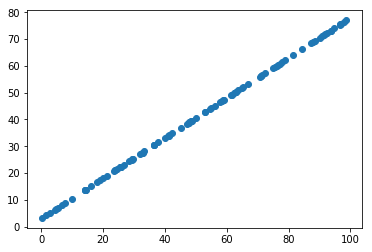

In [95]:
plt.scatter(X2[:,0],X2[:,1])

In [96]:
X2_demean = demean(X2)

In [99]:
w2 = gradient_ascent(df_math,X2_demean,initial_w,eta)
w2

array([0.79999995, 0.60000006])

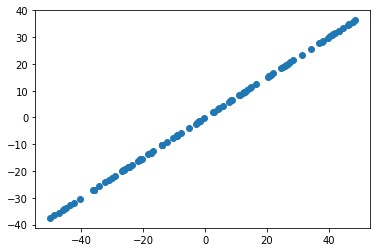

In [101]:
plt.scatter(X2_demean[:,0],X2_demean[:,1])
plt.plot([0,w2[0]*30],[0,w2[1]*30],color = "r")

In [98]:
# test

In [21]:
c = np.array([[1,2],[3,4],[5,6]])
c

array([[1, 2],
       [3, 4],
       [5, 6]])

In [22]:
np.arange(4).reshape(2,2)+c

ValueError: operands could not be broadcast together with shapes (2,2) (3,2) 

In [24]:
c = np.array([[1,2],[3,4],[5,6],[7,8]])
c

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [25]:
np.arange(4).reshape(2,2)+c

ValueError: operands could not be broadcast together with shapes (2,2) (4,2) 

In [27]:
c = np.array([[1,2]])
c

array([[1, 2]])

In [28]:
b = np.arange(4).reshape(2,2)
b

array([[0, 1],
       [2, 3]])

In [29]:
b-c

array([[-1, -1],
       [ 1,  1]])

In [30]:
b+c

array([[1, 3],
       [3, 5]])

In [11]:
a = np.mean(X,axis = 0)
a

array([53.89087811, 43.74866116])

In [17]:
np.arange(4).reshape(2,2)*a

array([[  0.        ,  43.74866116],
       [107.78175622, 131.24598347]])

In [18]:
np.arange(4).reshape(2,2)*np.arange(4).reshape(2,2)

array([[0, 1],
       [4, 9]])